# Ch.2 Accessing Text Corpora and Lexical Resources

#### corpora
large bodies of linguistic data  
Practical work in Natural Language Processing typically uses corpora

## 1. Accessing Text Corpora
#### text corpus 
large body of text  
Many corpora are designed to contain a careful balance of material in one or more genres

### 1-1 Gutenberg Corpus
NLTK includes a small selection of texts from the Project Gutenberg electronic text archive, which contains some 25,000 free electronic books, hosted at http://www.gutenberg.org/.  
1. get the Python interpreter to load the NLTK package
2. ask to see the file identifiers in this corpus: nltk.corpus.gutenberg.fileids()

In [1]:
import nltk

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [4]:
len(emma)

192427

In [5]:
emma

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [6]:
emma2 = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [7]:
emma2

<Text: Emma by Jane Austen 1816>

In [8]:
emma2.concordance("the")

Displaying 25 of 5201 matches:
disposition , seemed to unite some of the best blessings of existence ; and had
ad lived nearly twenty - one years in the world with very little to distress or
ttle to distress or vex her . She was the youngest of the two daughters of a mo
 or vex her . She was the youngest of the two daughters of a most affectionate 
 of Emma . Between _them_ it was more the intimacy of sisters . Even before Mis
before Miss Taylor had ceased to hold the nominal office of governess , the mil
old the nominal office of governess , the mildness of her temper had hardly all
wed her to impose any restraint ; and the shadow of authority being now long pa
t , but directed chiefly by her own . The real evils , indeed , of Emma ' s sit
, indeed , of Emma ' s situation were the power of having rather too much her o
ttle too well of herself ; these were the disadvantages which threatened alloy 
atened alloy to her many enjoyments . The danger , however , was at present so 
 a gentle

When we defined emma, we invoked the words() function of the gutenberg object in NLTK's corpus package.  
words() (function) <- gutenberg (object) <- corpus (package) <- NLTK  
다시 한 번 정리하자면, NLTK에서 corpus는 제공되는 package이고, gutenberg는 그 안에 든 object이며(corpora 파일 안에 있는, 여러 텍스트파일을 담은 파일이다.), 그 안에 든 텍스트 파일에서 words() 라는 함수를 쓸 수 있다. 


it is cumbersome to type such long names all the time -> Python provides another version of the import statement

In [9]:
from nltk.corpus import gutenberg

In [10]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [11]:
emma = gutenberg.words('austen-emma.txt')

short program to display other information about each text, by looping over all the values of fileid corresponding to the gutenberg file identifiers listed earlier and then computing statistics for each text  

displays three statistics for each text:  
- average word length
- average sentence length
- number of times each vocabulary item appears in the text on average

그리고, 함수들을 보면,
- gutenberg.raw() -> 하나의 그냥 일반, 큰 텍스트 - not split up into tokens 따라서, len을 구하면 space를 포함한 letter의 개수를 알려준다.
- gutenberg.words() -> 단어 단위로 모두 나눈다.
- gutenberg.sents() -> 문장 단위로 나누는데, 각 문장도 단어 단위로 나뉘어있다. - divides the text up into its sentences, where each sentence is a list of words

In [12]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab),fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


In [13]:
gutenberg.raw('austen-emma.txt')

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

In [14]:
gutenberg.words('austen-emma.txt')

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

In [15]:
gutenberg.sents('austen-emma.txt')

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'], ['VOLUME', 'I'], ...]

In [16]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

In [17]:
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

In [18]:
macbeth_sentences[1116]

['Double',
 ',',
 'double',
 ',',
 'toile',
 'and',
 'trouble',
 ';',
 'Fire',
 'burne',
 ',',
 'and',
 'Cauldron',
 'bubble']

In [19]:
longest_len = max(len(s) for s in macbeth_sentences)

In [20]:
[s for s in macbeth_sentences if len(s) == longest_len]

[['Doubtfull',
  'it',
  'stood',
  ',',
  'As',
  'two',
  'spent',
  'Swimmers',
  ',',
  'that',
  'doe',
  'cling',
  'together',
  ',',
  'And',
  'choake',
  'their',
  'Art',
  ':',
  'The',
  'mercilesse',
  'Macdonwald',
  '(',
  'Worthie',
  'to',
  'be',
  'a',
  'Rebell',
  ',',
  'for',
  'to',
  'that',
  'The',
  'multiplying',
  'Villanies',
  'of',
  'Nature',
  'Doe',
  'swarme',
  'vpon',
  'him',
  ')',
  'from',
  'the',
  'Westerne',
  'Isles',
  'Of',
  'Kernes',
  'and',
  'Gallowgrosses',
  'is',
  'supply',
  "'",
  'd',
  ',',
  'And',
  'Fortune',
  'on',
  'his',
  'damned',
  'Quarry',
  'smiling',
  ',',
  'Shew',
  "'",
  'd',
  'like',
  'a',
  'Rebells',
  'Whore',
  ':',
  'but',
  'all',
  "'",
  's',
  'too',
  'weake',
  ':',
  'For',
  'braue',
  'Macbeth',
  '(',
  'well',
  'hee',
  'deserues',
  'that',
  'Name',
  ')',
  'Disdayning',
  'Fortune',
  ',',
  'with',
  'his',
  'brandisht',
  'Steele',
  ',',
  'Which',
  'smoak',
  "'",
  'd',
 

## 1-2 Web and Chat Text

Project Gutenberg는 다양한 종류의, 수많은 책들을 담고 있다.

webtext를 불러와서 raw한 텍스트를 불러왔다.

In [21]:
from nltk.corpus import webtext

In [22]:
for fileid in webtext.fileids():
    print(fileid, '-', webtext.raw(fileid)[:65],'...')

firefox.txt - Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt - SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt - White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt - PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt - 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt - Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [23]:
from nltk.corpus import nps_chat

In [24]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

In [25]:
chatroom[123]

['i',
 'do',
 "n't",
 'want',
 'hot',
 'pics',
 'of',
 'a',
 'female',
 ',',
 'I',
 'can',
 'look',
 'in',
 'a',
 'mirror',
 '.']

### 1-3 Brown Corpus
the first million-word electronic corpus of English, created in 1961 at Brown University  
contains text from 500 sources, and the sources have been categorized by genre

convenient resource for studying systematic differences between genres, ***stylistics***

In [26]:
from nltk.corpus import brown

In [27]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [28]:
brown.words(categories = 'news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [29]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [30]:
brown.sents(categories = ['news', 'editorial','reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

news 카테고리에서 words를 이용하여 단어 단위로 나눈 다음,  
모두 소문자로 바꿔주고 분포를 세준다.  
그 후 단어 몇 가지를 정한 다음,  
각각의 단어마다 단어와 개수를 print해준다.

In [31]:
news_text = brown.words(categories = 'news')

In [32]:
fdist = nltk.FreqDist(w.lower() for w in news_text)

In [33]:
modals = ['can','could','may','might','must','will']

In [34]:
for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [35]:
news_text

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

#### conditional frequency distributions


#### tabulate 함수
두 parameter (conditions, samples)를 받아 표로 표현한다.

In [36]:
cfd = nltk.ConditionalFreqDist((genre, word) 
                               for genre in brown.categories() 
                               for word in brown.words(categories=genre))

In [37]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']

In [38]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [39]:
cfd.tabulate(conditions = genres, samples = modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


In [40]:
cfd

<ConditionalFreqDist with 15 conditions>

### 1-4 Reuters Corpus
Reuters Corpus contains 10,788 news documents totaling 1.3 million words.  
The documents have been classified into 90 topics, and grouped into two sets, called ***"training" and "test"***  
This split is for training and testing algorithms that automatically detect the topic of a document

In [41]:
from nltk.corpus import reuters

In [42]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [43]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

Unlike the Brown Corpus, categories in the Reuters corpus ***overlap with each other***, simply because a news story often covers multiple topics.  
그래서 topics covered by one or more documents나 documents included in one or more categories를 불러올 수 있다.

In [44]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [45]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [46]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

In [47]:
reuters.fileids(['barley','corn'])

['test/14832',
 'test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875',
 'test/15877',
 'test/15890',
 'test/15904',
 'test/15906',
 'test/15910',
 'test/15911',
 'test/15917',
 'test/15952',
 'test/15999',
 'test/16012',
 'test/16071',
 'test/16099',
 'test/16147',
 'test/16525',
 'test/16624',
 'test/16751',
 'test/16765',
 'test/17503',
 'test/17509',
 'test/17722',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18035',
 'test/18263',
 'test/18482',
 'test/18614',
 'test/18908',
 'test/18954',
 'test/18973',
 'test/19165',
 'test/19275',
 'test/19668',
 'test/19721',
 'test/19821',
 'test/20018',
 'test/20366',
 'test/20637',
 'test/20645',
 'test/20649',
 'test/20723',
 'test/20763',
 'test/21091',
 'test/21243',
 'test/21493',
 'training/10120',
 'trai

In [48]:
reuters.words('training/9865')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [49]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [50]:
reuters.words(categories = 'barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [51]:
reuters.words(categories = ['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

## 1.5 Inaugural Address Corpus

#### Inaugural Address Corpus
a collection of 55 texts, one for each presidential address  
has time dimension

In [52]:
from nltk.corpus import inaugural

In [53]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [54]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017']

In [55]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) 
                               for fileid in inaugural.fileids() 
                               for w in inaugural.words(fileid) 
                               for target in ['america', 'citizen'] 
                               if w.lower().startswith(target))

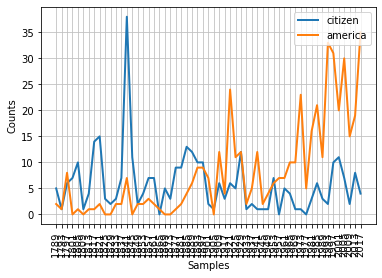

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
cfd.plot()

## 1-6 Annotated Text Corpora

## 1-7 Corpora in Other Languages

In [57]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [58]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [59]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [60]:
nltk.corpus.udhr.fileids()

['Abkhaz-Cyrillic+Abkh',
 'Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1',
 'Aymara-Latin1',
 'Balinese-Latin1',
 'Bambara-UTF8',
 'Baoule-UTF8',
 'Basque_Euskara-Latin1',
 'Batonu_Bariba-UTF8',
 'Belorus_Belaruski-Cyrillic',
 'Belorus_Belaruski-UTF8',
 'Bemba-Latin1',
 'Bengali-UTF8',
 'Beti-UTF8',
 'Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Bora-Latin1',
 'Bosnian_Bosanski-Cyrillic',
 'Bosnian_Bosanski-Latin2',
 'Bosnian_Bosanski-UTF8',
 'Breton-Latin1',
 'Bugisnese-Latin1',
 'Bulgarian_Balgarski-Cyrillic',
 'Bulgarian_Balgarski-UTF8',
 'Cakchiquel-Latin1',
 'Campa_Pajonalino-Latin1',
 'Candoshi-Shapra-Latin1',
 'Caquinte-Latin

In [62]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

In [63]:
from nltk.corpus import udhr

In [64]:
languages = ['Chickasaw','English','German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik' ]

In [66]:
cfd = nltk.ConditionalFreqDist((lang,len(word)) 
                               for lang in languages 
                               for word in udhr.words(lang+'-Latin1'))

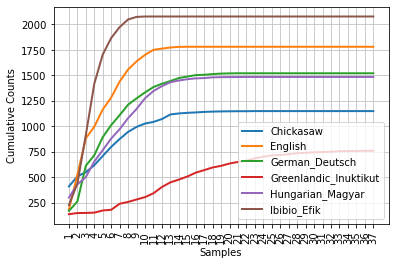

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [67]:
cfd.plot(cumulative=True)

## 1-8 Text Corpus Structure

## 1-9 Loading your own Corpus
강의 자료 참고

In [68]:
from nltk.corpus import PlaintextCorpusReader

In [72]:
# corpus_root = '/usr/share/dict'
# wordlists = PlaintextCorpusReader(corpus_root, '.*')

In [73]:
corpus_root = "c://nltk_data/corpora/Genomics-Informatics-Corpus-master/raw_text/"

In [74]:
wordlists = nltk.corpus.PlaintextCorpusReader(corpus_root, ".*\.txt", encoding = "utf-8")

In [75]:
wordlists2 = PlaintextCorpusReader(corpus_root, ".*\.txt", encoding = "utf-8")

In [78]:
wordlists.raw()

'Challenges and New Approaches in Genomics and Bioinformatics.\r\n\r\nThe science of biology aims to answer the question What is life?’ in the most systematic manner ever developed.\r\n\r\nModem biologists are, in fact, as philosophers were in the past. Bioinformatics, which will likely to be the future name of biology, employs information processing technology for biology to interpret the whole life process as a complex system with many computable layers of different kinds of elements. The layers can be encapsulated as classes or components of abstract objects for analysis and simulation. Eventually, the layers can form a recursive and self-similar pattern of information processing, providing a commonality in all the levels of life. As in fractal geometry, these patterns are suggested to be present naturally and universally in biology. That is why computable enzyme circuits of metabolic pathways for cancer can be applied to the simulation of bacterial interactions and even the socio\x

In [79]:
wordlists2.raw()

'Challenges and New Approaches in Genomics and Bioinformatics.\r\n\r\nThe science of biology aims to answer the question What is life?’ in the most systematic manner ever developed.\r\n\r\nModem biologists are, in fact, as philosophers were in the past. Bioinformatics, which will likely to be the future name of biology, employs information processing technology for biology to interpret the whole life process as a complex system with many computable layers of different kinds of elements. The layers can be encapsulated as classes or components of abstract objects for analysis and simulation. Eventually, the layers can form a recursive and self-similar pattern of information processing, providing a commonality in all the levels of life. As in fractal geometry, these patterns are suggested to be present naturally and universally in biology. That is why computable enzyme circuits of metabolic pathways for cancer can be applied to the simulation of bacterial interactions and even the socio\x

In [80]:
genre_word = [(genre, word)
...               for genre in ['news', 'romance']
...               for word in brown.words(categories=genre)]

In [81]:
genre_word

[('news', 'The'),
 ('news', 'Fulton'),
 ('news', 'County'),
 ('news', 'Grand'),
 ('news', 'Jury'),
 ('news', 'said'),
 ('news', 'Friday'),
 ('news', 'an'),
 ('news', 'investigation'),
 ('news', 'of'),
 ('news', "Atlanta's"),
 ('news', 'recent'),
 ('news', 'primary'),
 ('news', 'election'),
 ('news', 'produced'),
 ('news', '``'),
 ('news', 'no'),
 ('news', 'evidence'),
 ('news', "''"),
 ('news', 'that'),
 ('news', 'any'),
 ('news', 'irregularities'),
 ('news', 'took'),
 ('news', 'place'),
 ('news', '.'),
 ('news', 'The'),
 ('news', 'jury'),
 ('news', 'further'),
 ('news', 'said'),
 ('news', 'in'),
 ('news', 'term-end'),
 ('news', 'presentments'),
 ('news', 'that'),
 ('news', 'the'),
 ('news', 'City'),
 ('news', 'Executive'),
 ('news', 'Committee'),
 ('news', ','),
 ('news', 'which'),
 ('news', 'had'),
 ('news', 'over-all'),
 ('news', 'charge'),
 ('news', 'of'),
 ('news', 'the'),
 ('news', 'election'),
 ('news', ','),
 ('news', '``'),
 ('news', 'deserves'),
 ('news', 'the'),
 ('news', 'p

## 2-3 Plotting and Tabulating Distributions

In [82]:
from nltk.corpus import inaugural

In [84]:
cfd= nltk.ConditionalFreqDist((target, fileid[:4]) 
                              for fileid in inaugural.fileids() 
                              for w in inaugural.words(fileid) 
                              for target in ['america','citizen'] 
                              if w.lower().startswith(target))

In [85]:
cfd

<ConditionalFreqDist with 2 conditions>

In [86]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
          (lang, len(word)) 
          for lang in languages
          for word in udhr.words(lang + '-Latin1'))

In [87]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],
             samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 
